In [3]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
%matplotlib inline

sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 600
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [4]:
data = []

MAPPING = {
    "no partition": "no par",
    "1g.5gb isolated": "1g.5gb",
    # "1g.5gb+me isolated": "1g.5gb+me",
    "1g.10gb isolated": "1g.10gb",
    "2g isolated": "2g",
    "3g isolated": "3g",
    "4g isolated": "4g",
    "7g isolated": "7g",
}

def read_bench(fname, name):
    f = open(fname)
    lines = [l.rstrip() for l in f.readlines()]
    for row, line in enumerate(lines):
        s = line.split(',')
        if s[0] in MAPPING:
            data.append([
                MAPPING[s[0]],
                float(s[1]) * 1000.0,
                name
            ])
            #data['Category'].append(MAPPING[s[0]])
            #data['Values'].append(float(s[1]) * 1000.0)
    f.close()
    
read_bench('mig-isolation-bench-bfs-2024-03-27T23 00 40+01 00.out', 'bfs')
read_bench('mig-isolation-bench-resnet50py-2024-03-27T22 37 52+01 00.out', 'resnet50')
read_bench('mig-isolation-bench-bert-2024-03-27T23 41 09+01 00.out', 'bert')


In [5]:
final_df = pd.DataFrame(data=data,columns=['migsize', 'time', 'benchmark'])
final_df
#final_df = pd.concat(dfs)
#final_df['time'] /= 1000.0
final_df['benchmark'] = final_df['benchmark'].map({
    'resnet50': 'ResNet-50',
    'bfs': 'BFS',
    'bert': 'BERT-SQuAD'
})
final_df['migsize'] = final_df['migsize'].map({
    'no par': 'No MIG',
    '1g.5gb': '1g, 5GB',
    '1g.10gb': '1g, 10GB',
    '2g': '2g',
    '3g': '3g',
    '4g': '4g',
    '7g': '7g'
})
#final_df['size'] /= 1024.0

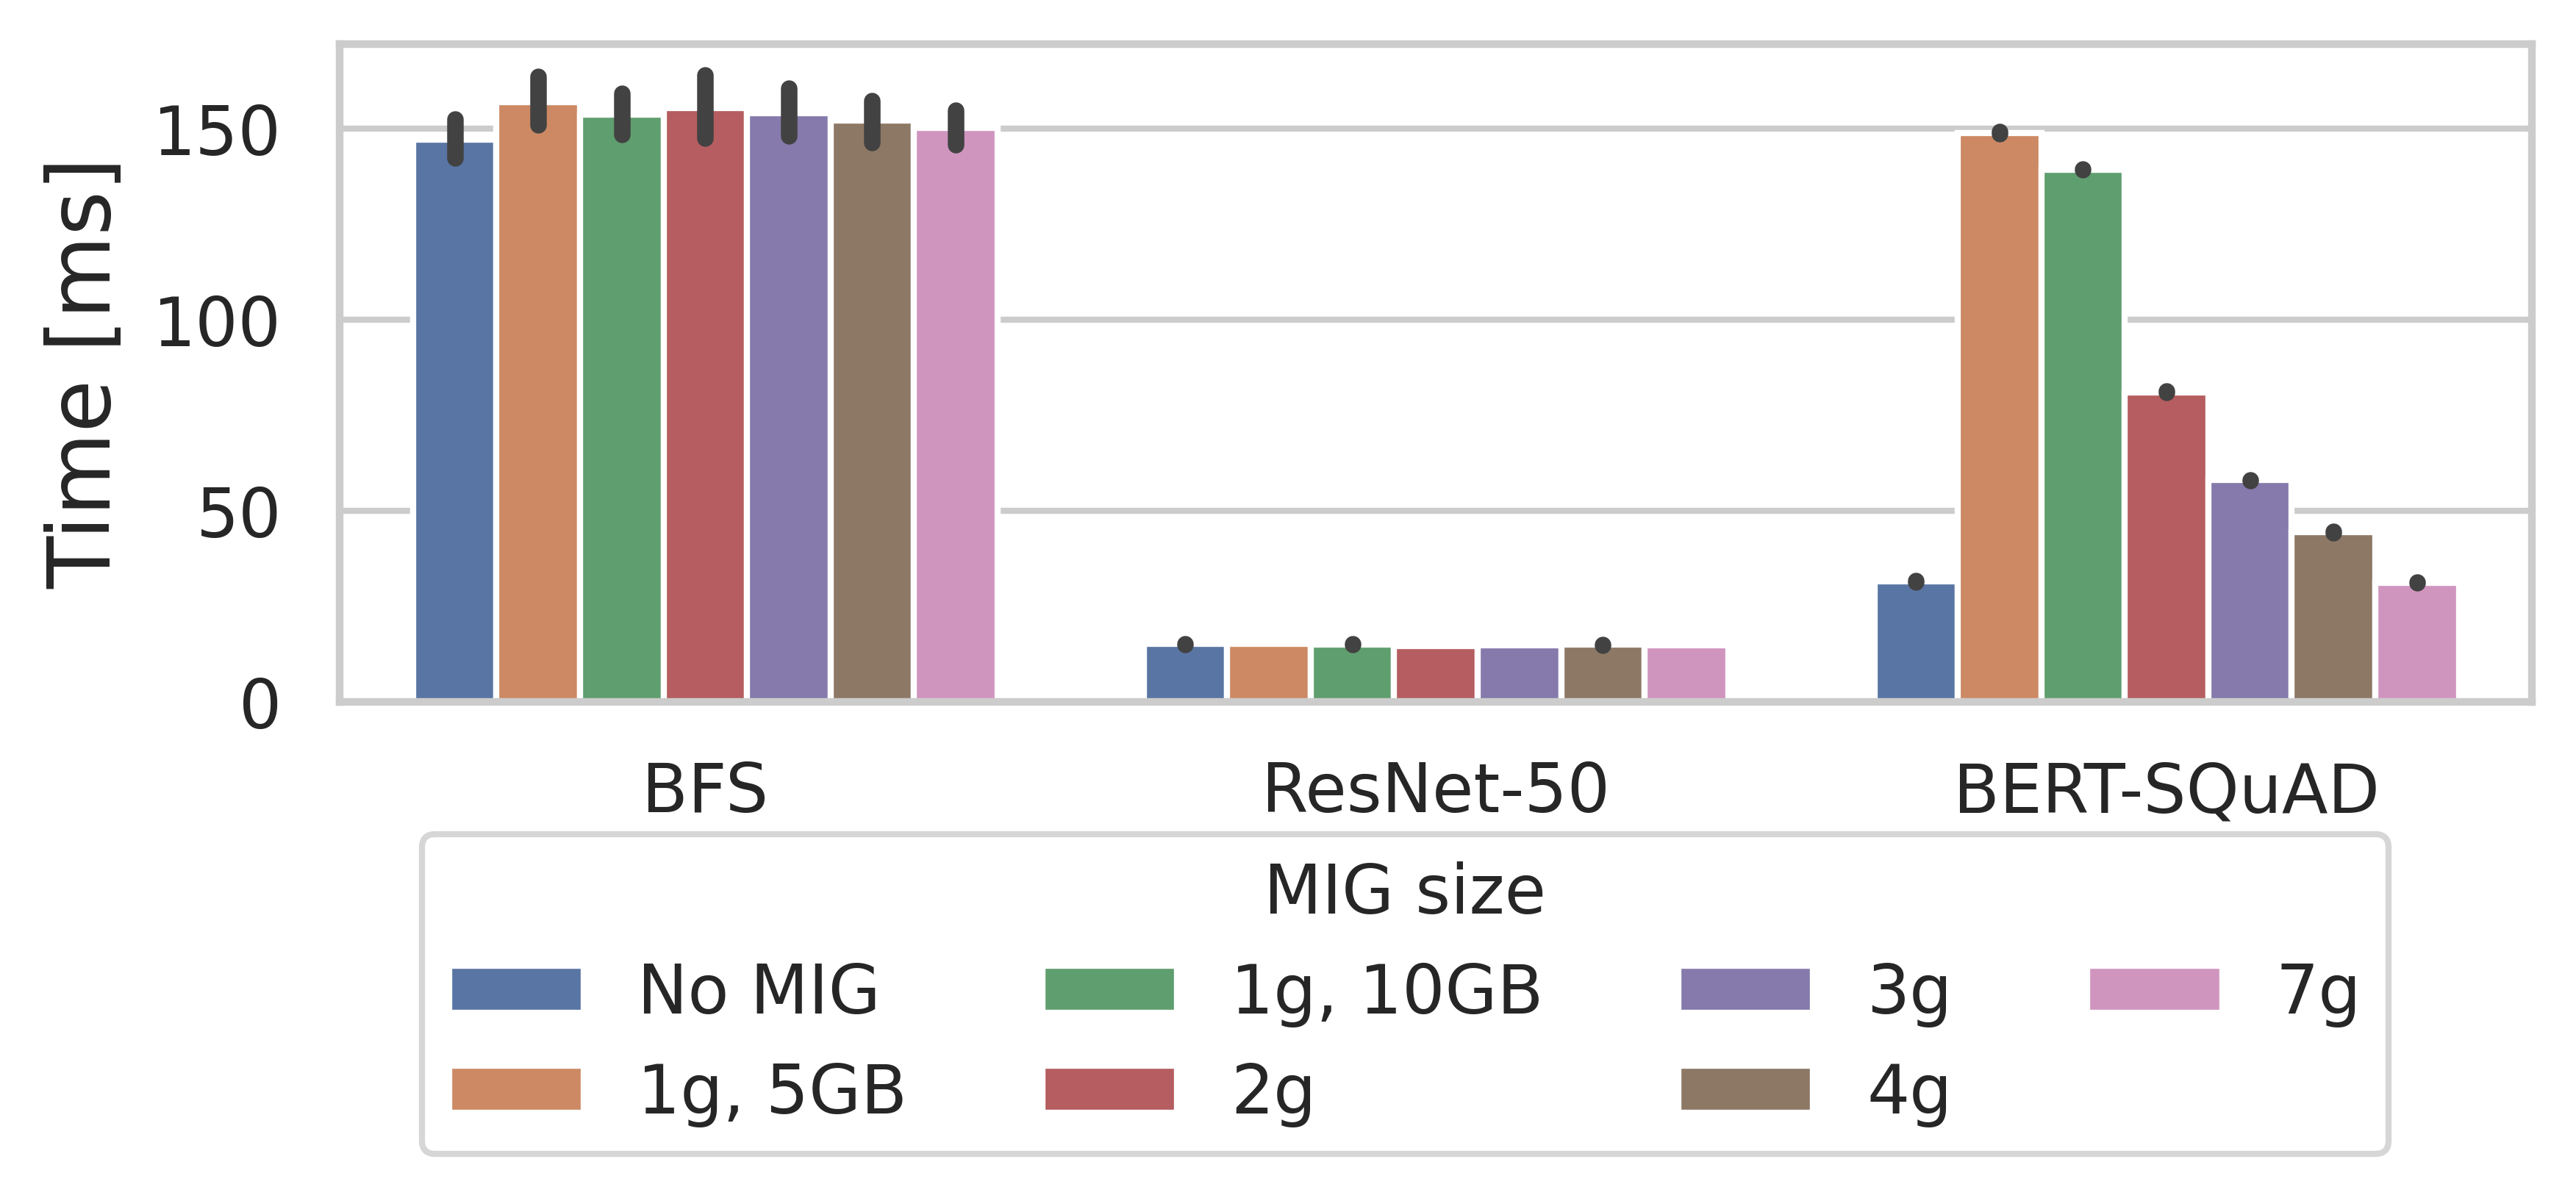

In [5]:

#fig = plt.figure(figsize=(4,2))
#ax = fig.gca()

sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style("whitegrid")
#g = sns.catplot(x='benchmark', y='time', hue='migsize', data=final_df, kind='bar') 
g = sns.barplot(x='benchmark', y='time', hue='migsize', data=final_df) #, height=5, aspect=1)

#g = sns.lineplot(data=final_df.loc[final_df['migsize'] == 'small'], x='size', y='time', hue='benchmark')
#g.set_xlabel('Co-located NAS benchmarks - (NAS application, input size, MPI ranks).',fontsize=14)
#g.set_xlabel('Size [kB]',fontsize=14)

g.set_ylabel('Time [ms]',fontsize=14)
g.set_xlabel('')
#g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='MIG size', fontsize=11,title_fontsize=11, ncols=4,loc='upper right', bbox_to_anchor=(0.95, -0.15))
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
#g.set_ylim([-4,6])
#g.axhline(y=0, color='black', linestyle='-')
#g.set_xlim([-0.5,5.5])
#g.set_xscale('log',base=2)
#g.set_xticks([0, 1024, 2048])
#g.set_xlim([0,1024])


plt.tight_layout()
plt.savefig("migsize.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)


In [6]:
x = 148.853109 / final_df.loc[final_df['benchmark'] == 'BERT-SQuAD'].groupby(['migsize']).mean() 
x

,time
migsize,
"1g, 10GB",1.068419
"1g, 5GB",1.000000
2g,1.837368
3g,2.566188
4g,3.352253
7g,4.769621
No MIG,4.724267


ValueError: Could not interpret value `size` for parameter `x`

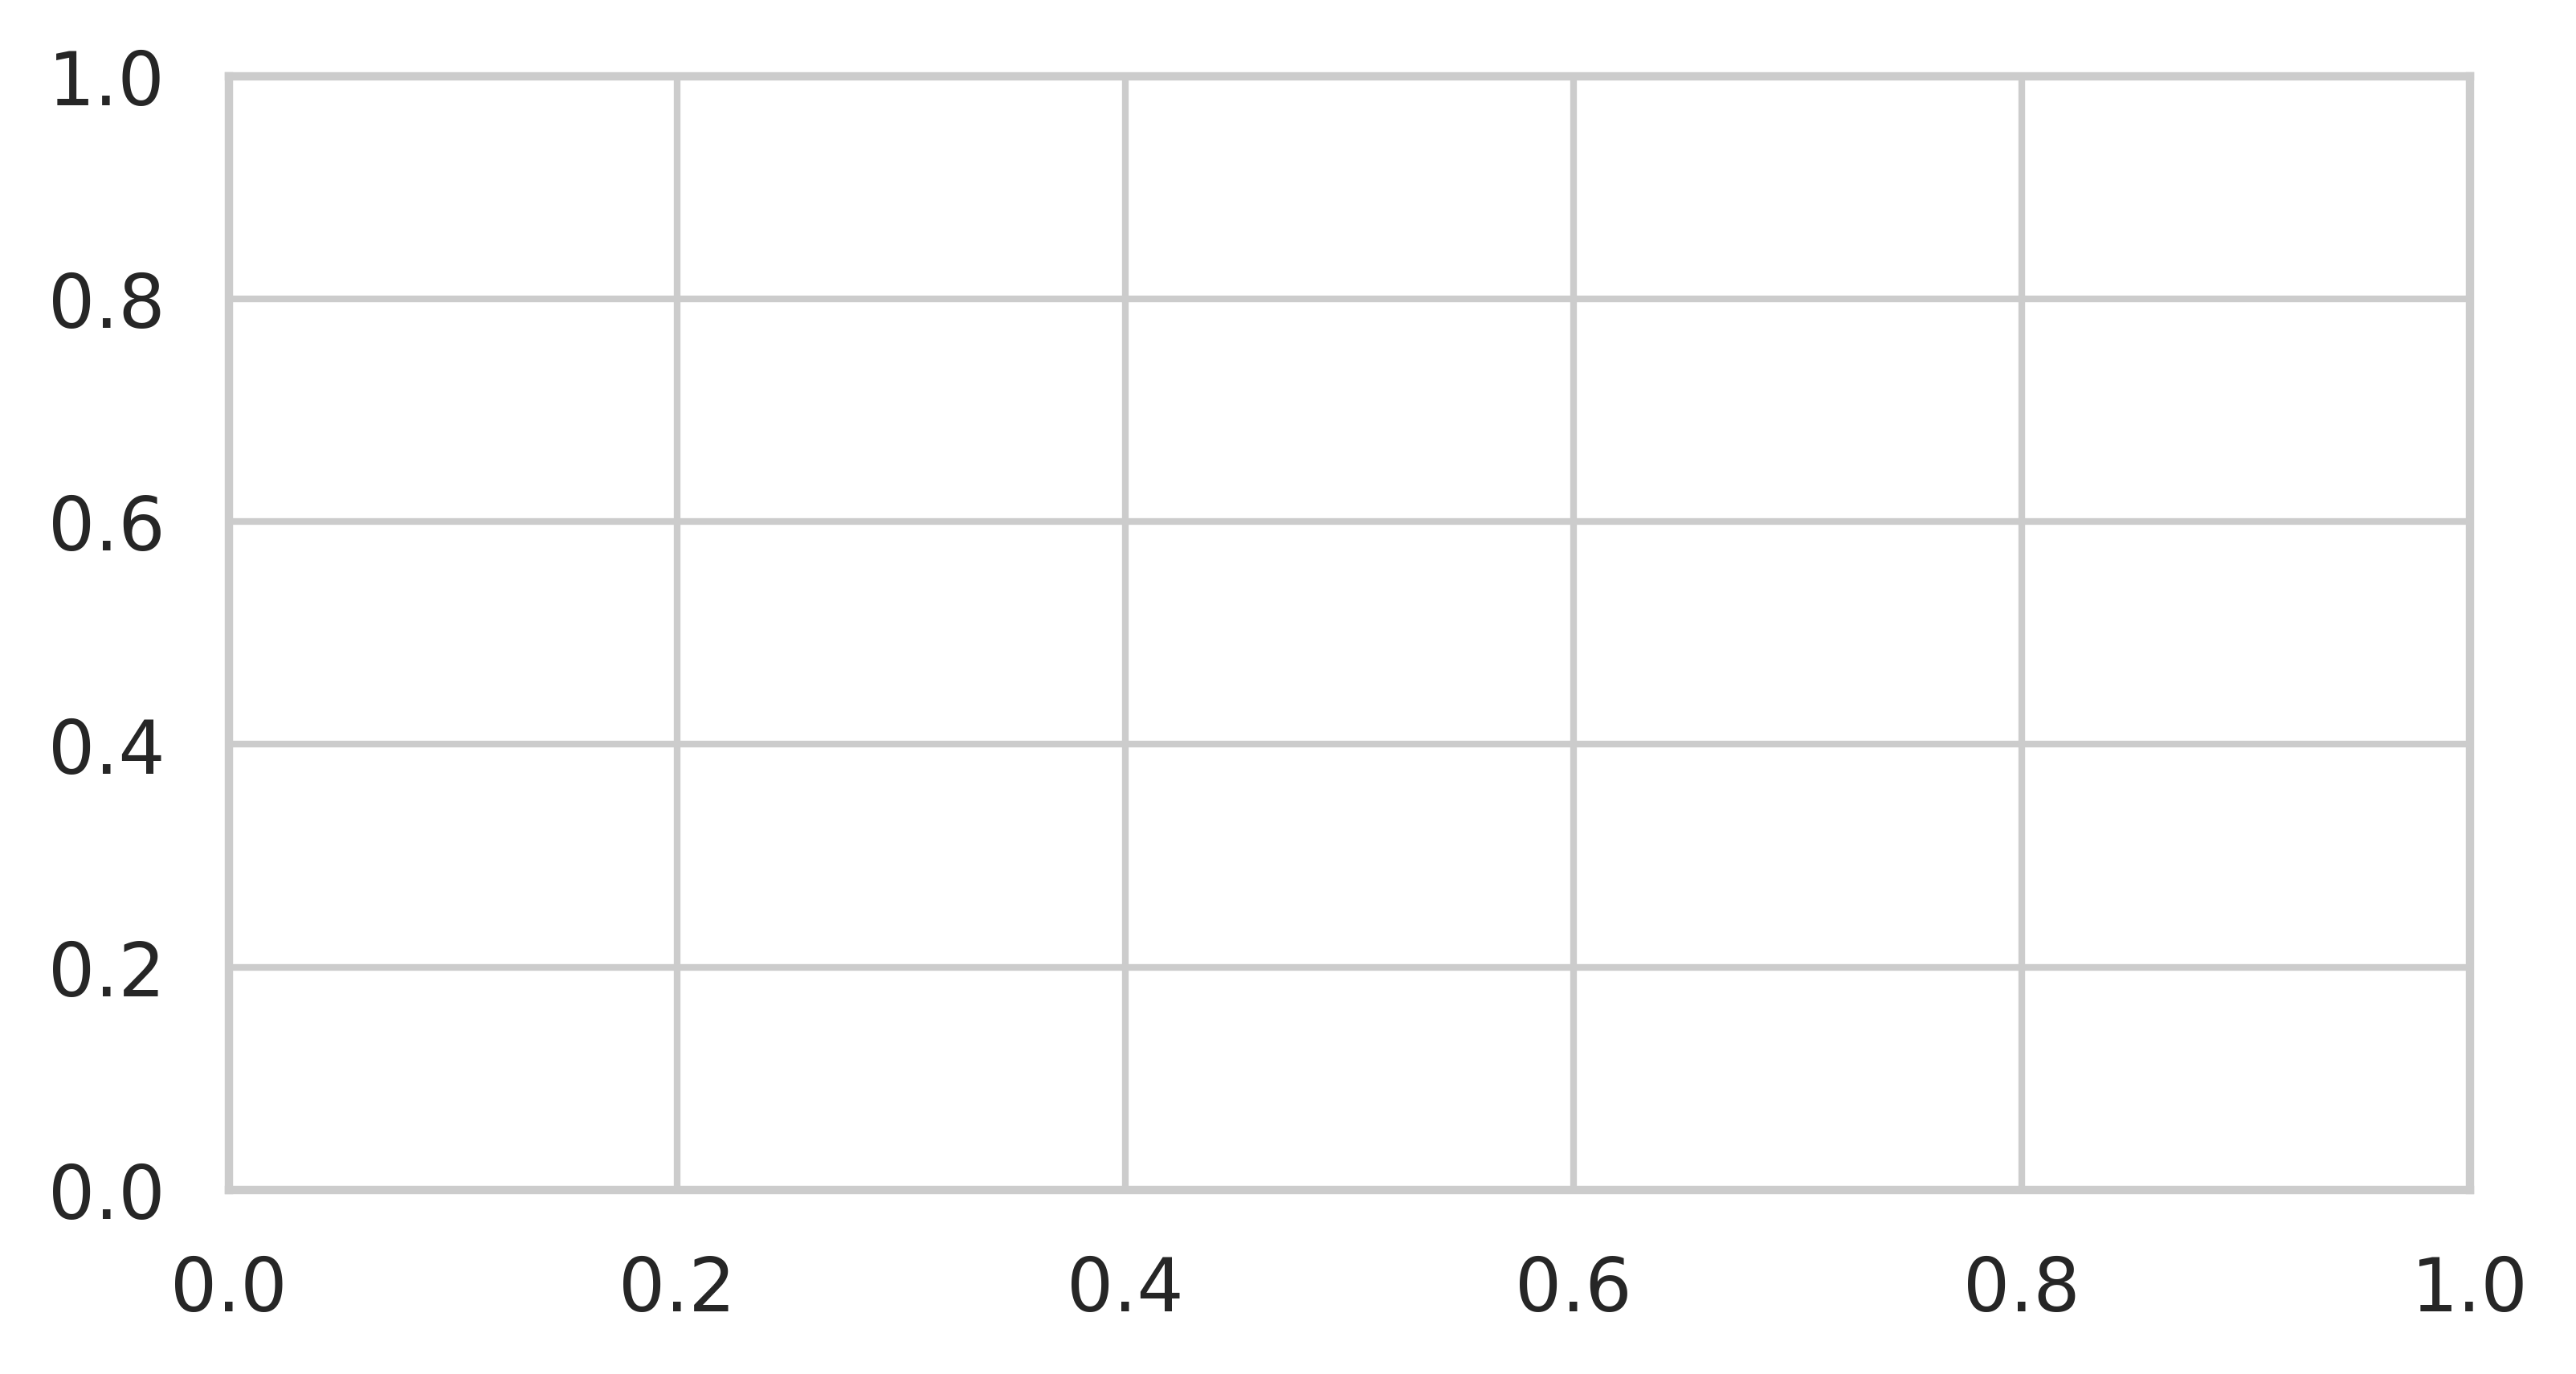

In [21]:

fig = plt.figure(figsize=(6,3))
ax = fig.gca()


g = sns.lineplot(data=final_df.loc[final_df['migsize'] == 'large'], x='size', y='time', hue='benchmark')
#g.set_xlabel('Co-located NAS benchmarks - (NAS application, input size, MPI ranks).',fontsize=14)
g.set_xlabel('Size [kB]',fontsize=14)
g.set_ylabel('Time [us]',fontsize=14)
#g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='', ncol=1, fontsize=11,title_fontsize=11, loc='lower right')
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
#g.set_ylim([-4,6])
#g.axhline(y=0, color='black', linestyle='-')
#g.set_xlim([-0.5,5.5])


plt.tight_layout()
#plt.savefig(os.path.join('plots', "cpu", "colocation_cpu_lulesh.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)


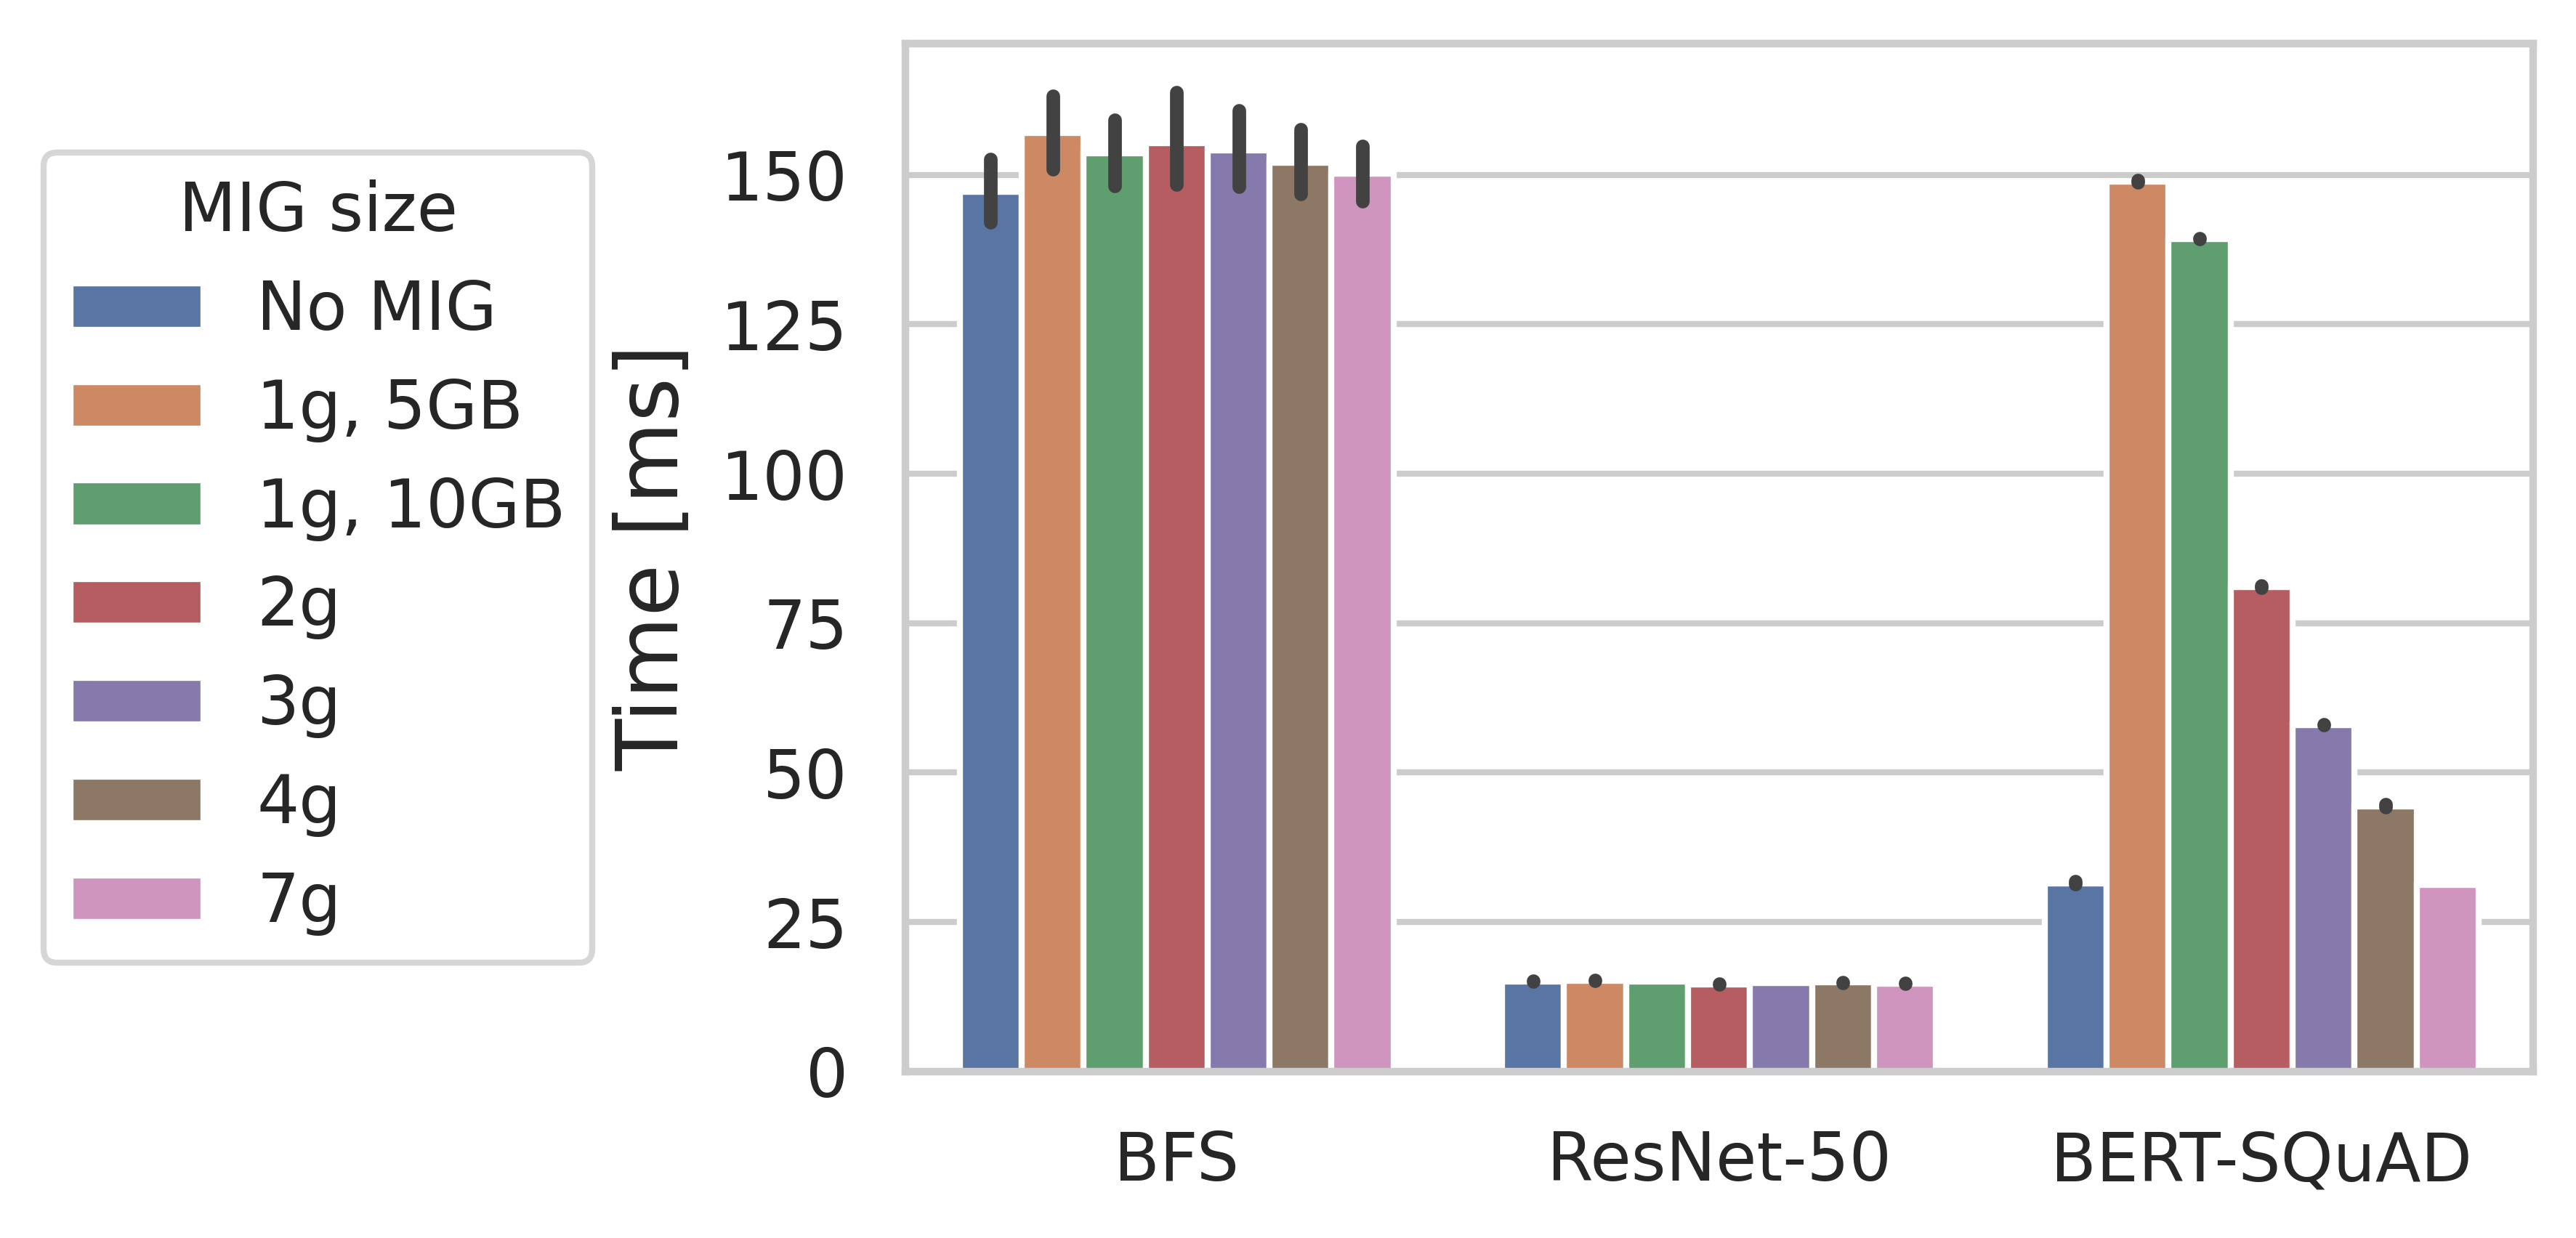

In [20]:

#fig = plt.figure(figsize=(4,2))
#ax = fig.gca()

sns.set(rc={'figure.figsize':(7, 3)})
sns.set_style("whitegrid")
#g = sns.catplot(x='benchmark', y='time', hue='migsize', data=final_df, kind='bar') 
g = sns.barplot(x='benchmark', y='time', hue='migsize', data=final_df) #, height=5, aspect=1)

#g = sns.lineplot(data=final_df.loc[final_df['migsize'] == 'small'], x='size', y='time', hue='benchmark')
#g.set_xlabel('Co-located NAS benchmarks - (NAS application, input size, MPI ranks).',fontsize=14)
#g.set_xlabel('Size [kB]',fontsize=14)

g.set_ylabel('Time [ms]',fontsize=14)
g.set_xlabel('')
#g.set_title('Slowdown of the batch job LULESH.',fontsize=16)
g.legend(title='MIG size', fontsize=11,title_fontsize=11, ncols=1,loc='center left', bbox_to_anchor=(-0.55, 0.5))
#plt.legend.set_title('LULESH problem size',prop={'fontsize':14})
#g.set_ylim([-4,6])
#g.axhline(y=0, color='black', linestyle='-')
#g.set_xlim([-0.5,5.5])
#g.set_xscale('log',base=2)
#g.set_xticks([0, 1024, 2048])
#g.set_xlim([0,1024])


plt.tight_layout()
plt.savefig("migsize_new.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)
